## Pipeline to explore proteins stored into Mongo Database

In [39]:
# Import modules
import pymongo
import pandas as pd
import seaborn as sns

In [3]:
# Create connetion
conn = pymongo.MongoClient()
db = conn.sequencesdb
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'sequencesdb')


In [7]:
# Print my collection (proteins)
db.list_collection_names()

['proteins']

In [14]:
# Checking the document structure
db.proteins.find_one()

{'_id': ObjectId('5cf6cf3ef4e2f510e5b8c212'),
 'code': 'SB0020CVL',
 'species': 'Bothops jararaca',
 'type_seq': 'nucleotide',
 'seq_size': 699,
 'id': 'TRINITY_DN17539_c4_g1_i2.p1|117-815(+)|BJAR454SVSP07_SVSP',
 'sequence': 'ATGGTGCTGATCAGAGTGCTAGCAAACCTTCTGATACTACAGCTTTCCTACGTACAAAAGTCTTCTGAACTGGTCGTTGGAGGTCGTCCATGTAACATAAATGAACATCGTTCCCTTGTTGTCTTGCTTAACTCTAGTGGGTTTCTCTGCGCTGGGACTTTGATCAACCAGGAATGGGTGCTCACTGCTGCACACTGCGACATTAAAAATCTCCAGATACAGCTTGGTGTGCATAGCAAAAAGGTACGAAATGAGGATGAGCAGACAAGAGACCCAAAGGAGAAGTTCTTTTGTCTCAGTAGCAAAACCAATAATGAATGGGAGAAGGACATCATGTTGATCAAGCTGGACAGTCGTGTTAGCAACAGTGAACACATCGCACCTCTCAGCTTGCCTTCCAGCCCTCCCAGTGTGGGATCACTTTGCCGTATTATGGGATGGGGCACAATCTCATCTACTAAAGAAACTTATCCCAATGTCCCTCGTTGTGCTAACATTAACATACTCGATTATGCAGTGTGTCGAGCAGCTTACCCATGGTGGCCGGCGACAACCAGAACATTATGTGCAGGTGTCCTGCAAGGAGGCAAAGATACATGTGAGGGTGACTCTGGGGGACCCCTCATCTGTAATGGACAAATCCAGGGCATTGTATCTTGGGGGTCGCATCCTTGTGGCCGACGTCTTAAGCCTGGCTTC',
 'tpm': 55.51,
 'fpkm': 74.58}

In [16]:
# Check sequence type
db.proteins.distinct('type_seq')

['nucleotide']

In [20]:
# Total of sequences
db.proteins.count_documents({})

276

In [33]:
# Convert a collection to a dataframe
df = pd.DataFrame(list(db.proteins.find()))

In [34]:
df.head()

,_id,code,fpkm,id,seq_size,sequence,species,tpm,type_seq
0,5cf6cf3ef4e2f510e5b8c212,SB0020CVL,74.58,TRINITY_DN17539_c4_g1_i2.p1|117-815(+)|BJAR454...,699,ATGGTGCTGATCAGAGTGCTAGCAAACCTTCTGATACTACAGCTTT...,Bothops jararaca,55.51,nucleotide
1,5cf6cf3ef4e2f510e5b8c213,SB0020CVL,2.32,comp3_seq30.p1|5195-4413(-)|BJAR454SVSP04_SVSP,783,ATGGTGCTGATCAGAGTACTAGCAAACCTTCTGATACTACAGCTTT...,Bothops jararaca,1.73,nucleotide
2,5cf6cf3ef4e2f510e5b8c214,SB0020CVL,16196.42,k127_NODE_8838_length_1048_cov_5093.282302_g82...,720,ATGATTGCCTTCATTGTCTTGCTAATTCTTGCTGCAGTGTTGCAAC...,Bothops jararaca,12054.97,nucleotide
3,5cf6cf3ef4e2f510e5b8c215,SB0020CVL,1445.12,cl_24411_1.p1|2793-91(-)|BJAR454DIESTER2_DIESTER,2703,CCTGTTGTCACTTCCAGCAGTTCCTTGAGACTGGATAGTACCTCCC...,Bothops jararaca,1075.60,nucleotide
4,5cf6cf3ef4e2f510e5b8c216,SB0020CVL,30.32,TRINITY_DN18143_c2_g1_i16.p3|1027-569(-)|Q90X2...,459,ATGCTCCCGGGTGCCAGCTTCAGGGCTGGACCCTTTGCTAACTGGG...,Bothops jararaca,22.57,nucleotide


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 9 columns):
_id         276 non-null object
code        276 non-null object
fpkm        276 non-null float64
id          276 non-null object
seq_size    276 non-null int64
sequence    276 non-null object
species     276 non-null object
tpm         276 non-null float64
type_seq    276 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 19.5+ KB


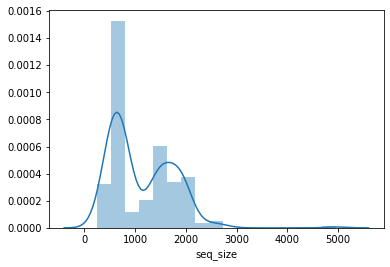

In [40]:
sns.distplot(df.seq_size)

In [ ]:
sns.distplot(df.seq_size)